## Phase 2 Project

Final Project Submission
Please fill out:

- Student name: Andrew Levinton
- Student pace: self paced
- Scheduled project review date/time:
- Instructor name: Ahbhineet Kukarni
- Blog post URL:

## Business Problem:
# Stakeholder: Real Estate Agency - Zillow

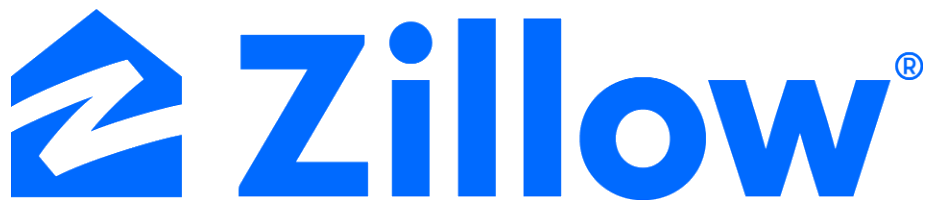

# Problem: 
Business problem - Provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### How problem will be approached

This problem will be approached using information from a built in linear regression model. The model will be built using both numerical and categorical data to provide what features may help to increase the price of peoples homes. Numerical data will be explored and categorical data will be added after in an attempt to improve the model.

### Description of the Data:
King County House Sales dataset
columns can be referred to in readme.

### Target variable
* `price` - Sale price (prediction target)

Possible continuous numerical predictors, based on correlation:

Based on correlation coefficient:
- `sqft_living`- Square footage of living space in the home
- `sqft_above`- Square footage of house apart from basement
- `bathrooms`- Number of bathrooms
- `sqft_patio`- Square footage of outdoor porch or deck space
- `bedrooms` - Number of bedrooms
-`sqft_garage`- Square footage of garage space

Other numerical variables:
- `sqft_lot` - Square footage of the lot
- `sqft_basement` - Square footage of the basement
- `lat` - Latitude coordinate
- `long` - Longitude coordinate

### Simple Linear Regression on select features

These categories are interesting because they are both continuous and integer values that 

Possible string categorical variables:
- `greenbelt`- Whether the house is adjacent to a green belt
- `view`- Quality of view from house
- `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
- `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `date` - Date house was sold

Possible numerical categorical variables:
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code

* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each 


* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `floors` - Number of floors (levels) in house

Assumption check:
- `Is it linear?`
- `Is it normal?`
    - histogram
    - QQ-plot
- `Is it homoscedastic?`

### Plan for building stats model:
- Narrow down variables to selections(also known as FEATURES)
- One hot encode any categorical variables for plotting purposes
- be prepared to remove certain "dummies" from the dataset to optimize one hot encoding. 

### Process for "narrowing":
- Look at:
    - `Scatter plots`
    - `histograms`
    - `correlation coefficients`
    - `statsmodel p-values to test if the feature is statistically significant`
- Try transforming the data via linear, logarithmic or polynomial transformation to see how shape of data changes. 

### Variance inflation factor (VIF)

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF = 1 / (1 - R^2)

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

The list of variance inflation factors are calculated for each numerical value below:


#### VIF Data: 

* `price`: 4.32
* `bedrooms`: 24.61
* `bathrooms`: 24.74
* `sqft_living`: 115.26
* `sqft_lot`: 1.14
* `floors`: 15.61
* `sqft_above`: 89.28
* `sqft_basement`: 6.38
* `sqft_garage`: 3.84
* `sqft_patio`: 2.23
* `yr_built`: 1057.3
* `yr_renovated`: 1.1
* `lat`: 2375.3
* `long`: 1099.66
* `month`: 699.65
* `day_of_year`: 614.34

#### VIF levels:

- Good: VIF <= 5

- Moderate/Questionable: VIF >=5 and VIF <= 10

- Throw out: VIF >= 10

#### Good VIFS: 
- `price`: 4.32
- `sqft_lot`: 1.14
- `sqft_garage`: 3.84
- `sqft_patio`: 2.23
- `yr_renovated`: 1.1

#### Questionable VIFS: 
- `sqft_basement`: 6.38

#### Throw out VIFS: 
- `bedrooms`: 24.61
- `bathrooms`: 24.74
- `sqft_living`: 115.26
- `floors`: 15.61
- `sqft_above`: 89.28
- `yr_built`: 1057.3
- `lat`: 2375.3
- `long`: 1099.66
- `month`: 699.65
- `day_of_year`: 614.34

It appears at first glance that the data only yields a small set of independent variables that are not highly collinear with eachother. This will be looked at again after the removal of outliers, and the transformation of data.

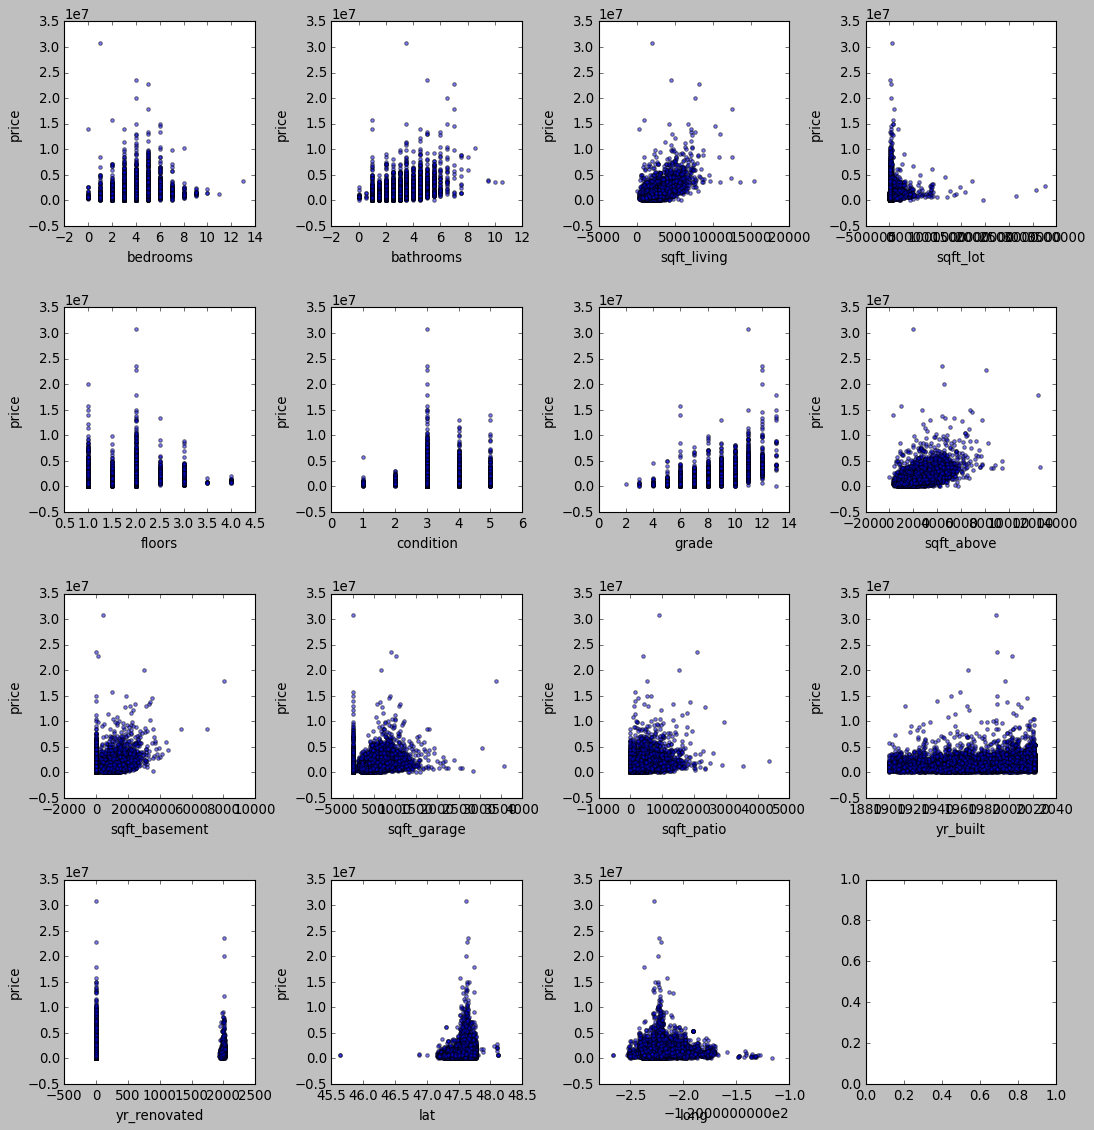

# Model #1 - numerical predictors only, some categorical
Predictors:
- `bedrooms`
- `bathrooms`
- `sqft_living`
- `sqft_lot`
- `floors`
- `condition` - redefined to numerical values
- `grade`- redefined to numerical values
- `sqft_above`
- `sqft_basement`
- `sqft_garage`
- `sqft_patio`
- `lat`
- `long`

Target variable:
- `price`


## Observations
p_value > 0.05

- `sqft_lot`
- `month`
- `cond_Fair`
- `cond_Poor`


** look at again after adjusting for outliers


 - All variables with a p_value > 0.05 are deemed statistically insignificant and will eventually be dropped from the final model.
 - With half the condition data(`cond_Fair`, `cond_Poor`) being insignificant in the model, it makes sense to drop the condition data completely. 
 - Month was not anticipated as an effective predictor because it is not typical for the season to affect the sale price of a house.
 
 
Additional Observations:
 - The adjusted r-squared value is .514, indicating that his model can explain approximately 51.4% of the data.
 -  Skew: A kurtosis value between -2 and +2 is good to prove normalcy. The kurtosis value is 10.060, indicating that this model is heavily skewed. This will be addressed through transformations to normalize the data. 

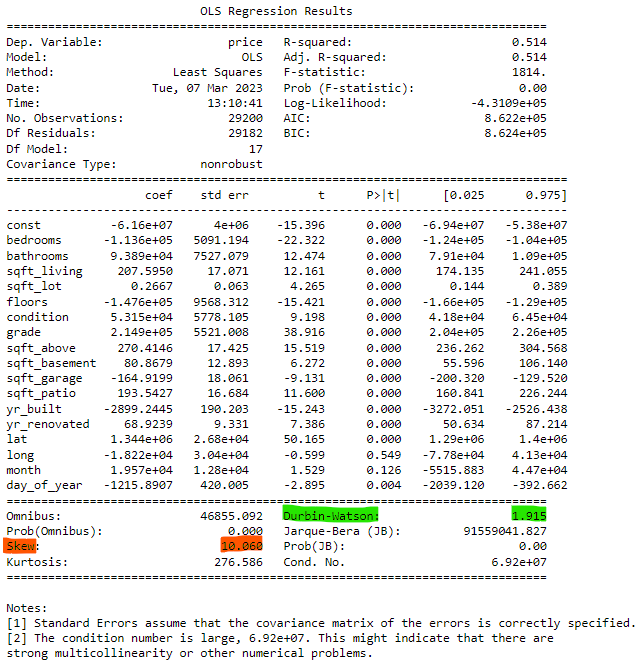

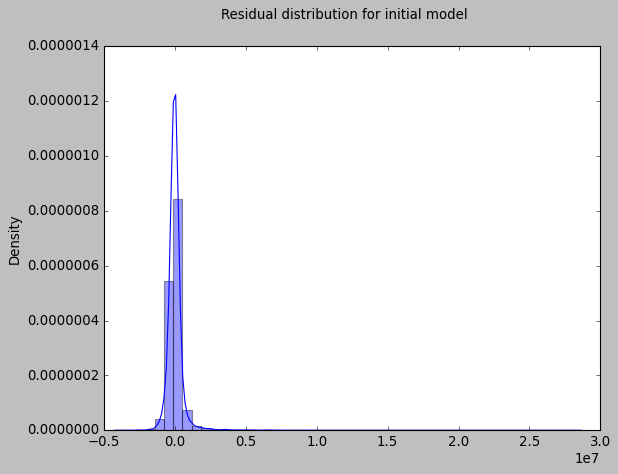

## Possible Improvements to be made to model:
- dropping of variables that are not statistically significant (Pval > 0.05)
- addition of categorial variables(one hot encoded)
- location would possibly be the most interesting variable, mapped against the waterfront or view variable
- transformation of data to satisfy normality assumption -ex: log transformation or square root transformation
- removal of outliers: Outliers in this case will be considered to be any data falling greater than 
  3 standard deviations outside the mean
### Goals
    - improve skewness
    - reduce homoscedacity
    - increase rsquared to promote higher level explanation of data from model

## Possible categorical variables of interest: 

* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `address` - The street address

The grade and condition are already changed to numerical variables, so this part of the analysis will focus on the string categorical variables. 

The address appears to be the most interesting variable in the batch because it can be mapped against the waterfronts or the quality of view from the houses. For this, we will extrapolate features of the address to reduce and categorize the location. 

Waterfont, greenbelt, nuisance, view, sewer(onehotencoded), and heat source(onehotencoded) are added to the model to see its effects.

## Model #2

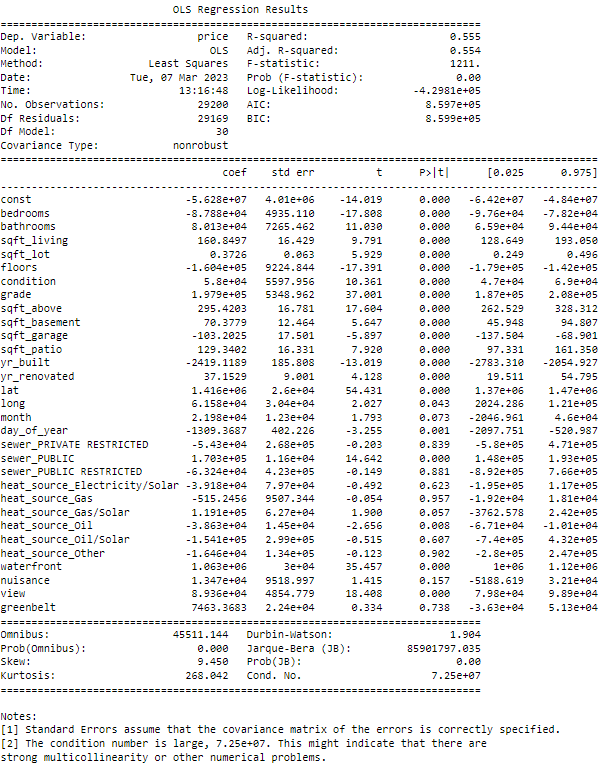

## Observations of Model 2
Predictors:
- 'bedrooms'
- 'bathrooms'
- 'sqft_living'
- 'floors'
- 'grade'
- 'sqft_above',
- 'sqft_basement'
- 'sqft_garage'
- 'sqft_patio'
- 'yr_built',
- 'yr_renovated'
- 'lat'
- 'long'
- 'day_of_year'
- 'waterfront'
- 'nuisance',
- 'view'
- 'heat_source' - one hot encoded
- 'sewer' - one hot encoded

pvalue > 0.05
- yr_renovated
- month
- sewer_PRIVATE RESTRICTED
- sewer_PUBLIC RESTRICTED
- heat_source_Electricity/Solar
- heat_source_Gas
- heat_source_Gas/Solar
- heat_source_Oil/Solar
- heat_source_Other
- nuisance
- greenbelt

Categorical variables of waterfront, nuisance, and view were encoded with numbers to see if improvements were made. 

Model is still highly skewed although did present itself with some improvements. Next steps will be to normalize the data by transforming features that are skewed within the data, as well as remove outliers

- Jarque-Bera score is sky high and must come down for the model to hold any validity. 
- Durbin Watson score is in the acceptable range of 1.50-2.50
- Rsquared has 'improved' but only at the expense of the the continued flaws mentioned before. 

## Next Steps
Next steps are to improve numerical variables by:
- `removing outliers to improve skew` 
- An outlier will be defined as three standard deviations away from the mean of the target variable.

- `transform variables so they are normally distributed within the model`
- The target variable will be transformed to normalize the distribution. 
- removing variables that have a pvalue > 0.05

## Model #3 - Ran after outliers are removed

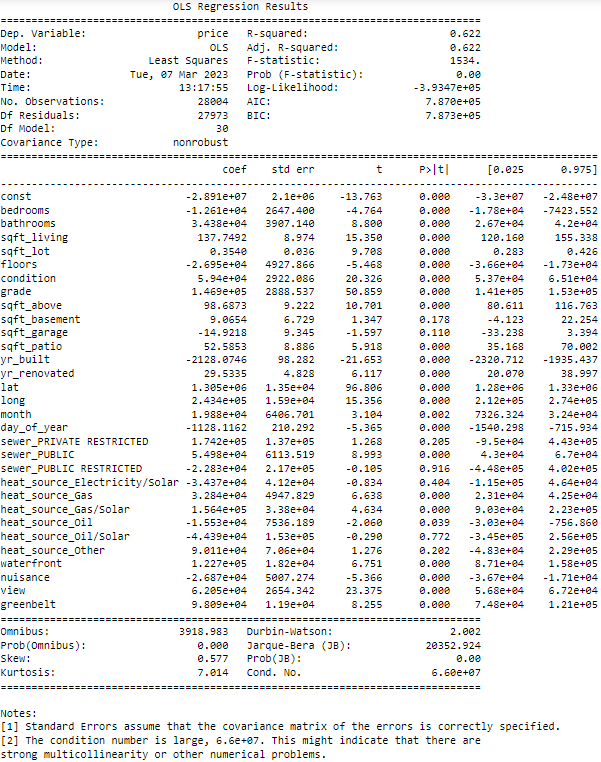

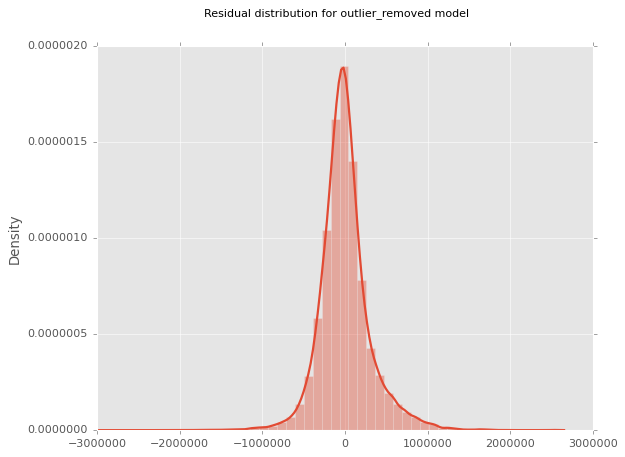

#### Predictors

- `bedrooms`
- `bathrooms` 
- `sqft_living` 
- `sqft_lot 
- `floors`
- `condition` 
- `grade` 
- `sqft_above` 
- `sqft_basement` 
- `sqft_garage`
- `sqft_patio` 
- `yr_built` 
- `yr_renovated` 
- `lat` 
- `long` 
- `month`
- `day_of_year` 
- `sewer_PRIVATE RESTRICTED` 
- `sewer_PUBLIC`
- `sewer_PUBLIC RESTRICTED` 
- `heat_source_Electricity/Solar`
- `heat_source_Gas` 
- `heat_source_Gas/Solar` 
- `heat_source_Oil`
- `heat_source_Oil/Solar` 
- `heat_source_Other` 
- `waterfront` 
- `nuisance`
- `view` 
- `greenbelt`

## Observations of model 3
pvalue > 0.05
- `sqft_basement` 
- `sqft_garage`
- `sewer_PRIVATE RESTRICTED`
- `sewer_PUBLIC RESTRICTED`
- `heat_source_Electricity/Solar`
- `heat_source_Oil/Solar`
- `heat_source_Other`



- Adjusted rsquared indicates that the model explains 62.2% of the data.
- Skewness has improved dramatically to an acceptable range between -2 and 2. The removal of outliers has made this possible.
- Durbin-Watson score is still in the acceptable ranges of 1.5-2.5
- Jarque-Bera score is still very high but has been brought down by a significant factor. Still not perfect but trending in the right direction.
- Multicollinearity is possibly present in the model and likely so given the initial VIFs before the first model was built. VIFS should be revisited again to see if those variables are worth keeping. 

# Looking at transformations for the target variable aka price.

## Histogram and QQplot of the target variable
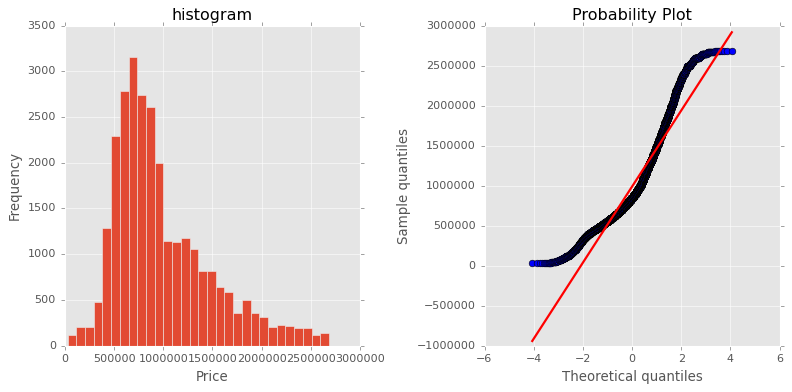

### Issue above is the data shows linearization everywhere but both tails of the data. Catching the lower tail will be the goal for the test of transformation. For this, we will try a root transformation. 


## Histogram and QQplot of the transformed target variable
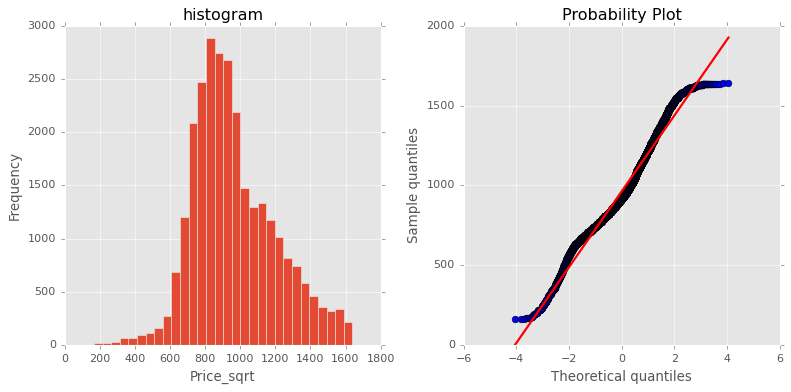



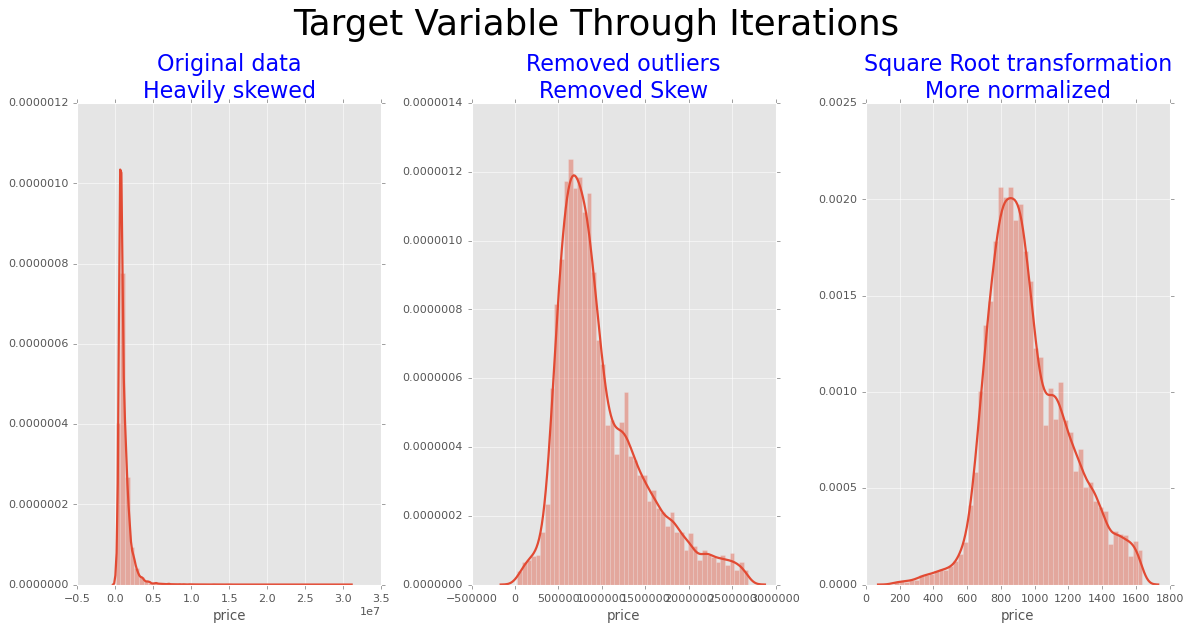

### Checking model with transformed target variable - square root transformation
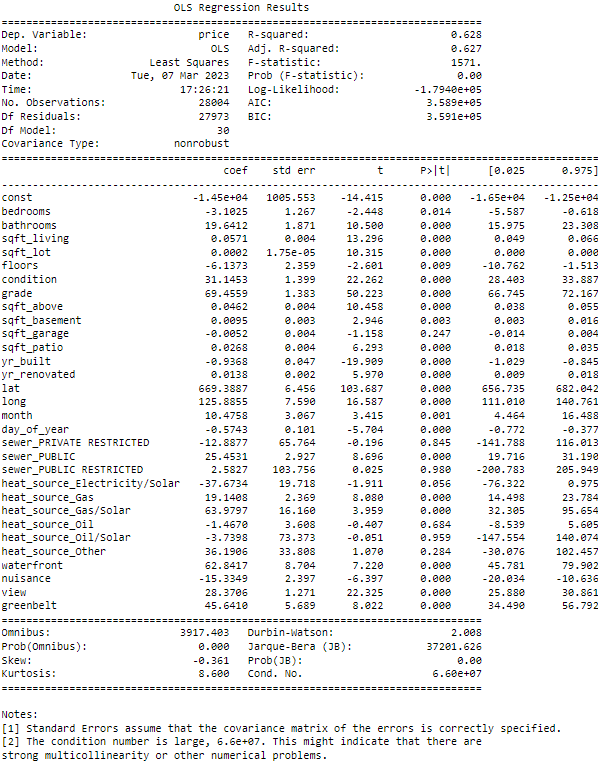


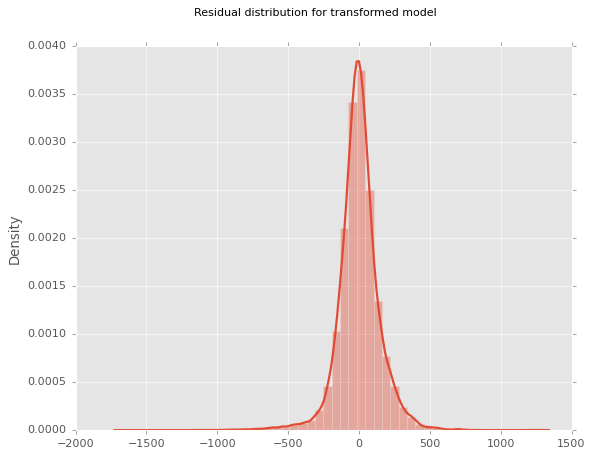


## y_log vs y_sqrt

The model with the square root transformation appears to be less skewed and possesses a higher rsquared value, lending the ability of the model to explain more of the data. For these reasons we will use y_sqrt as our dependent variable for now until y_log appears to outweight the benefit of y_sqrt.

Jarque-Beras score is significantly better as well with the y_sqrt variable so I'll go with it for now. 

## Checking distribution of predictor


### Looking at sqft_living
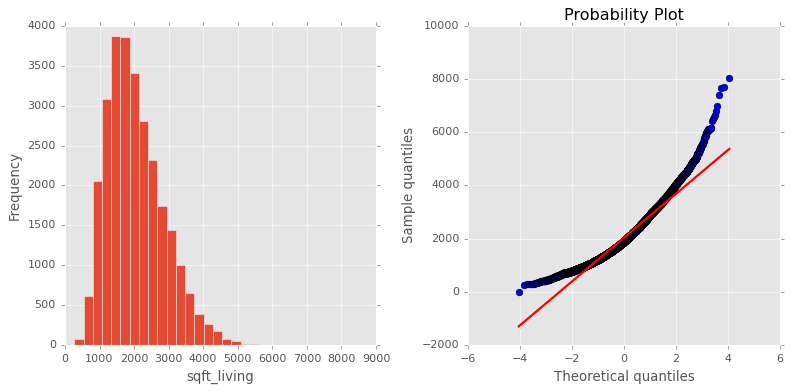

### Log transformed sqft_living (sqft_living_log)
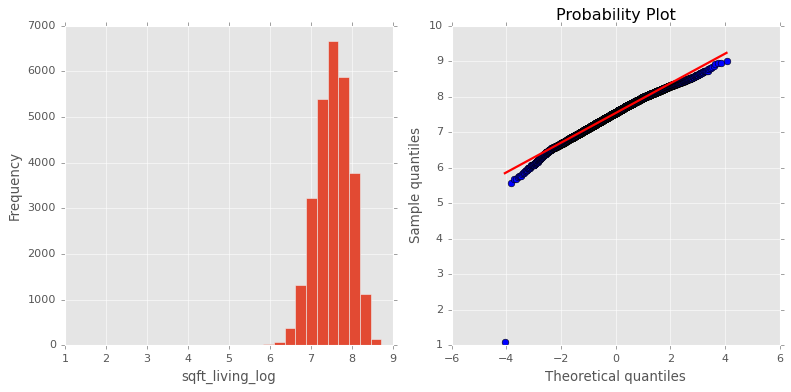

## Model ran one more time - after dropping bedrooms, and all onehotencoded variables with pval > 0,05

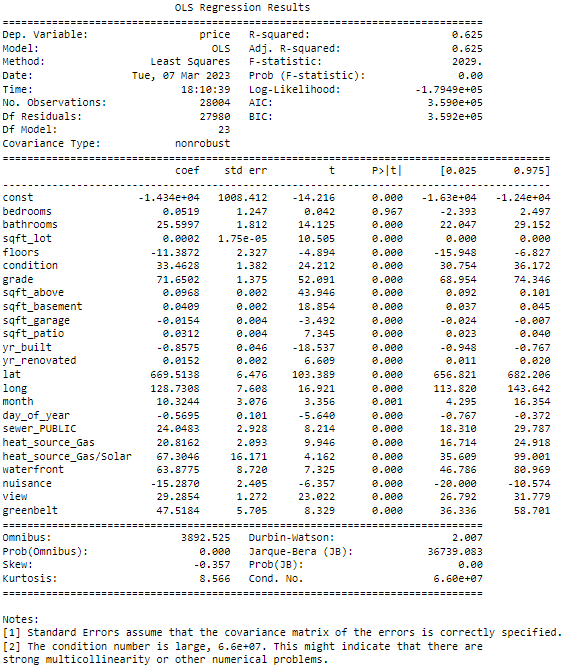

### Residual distribution
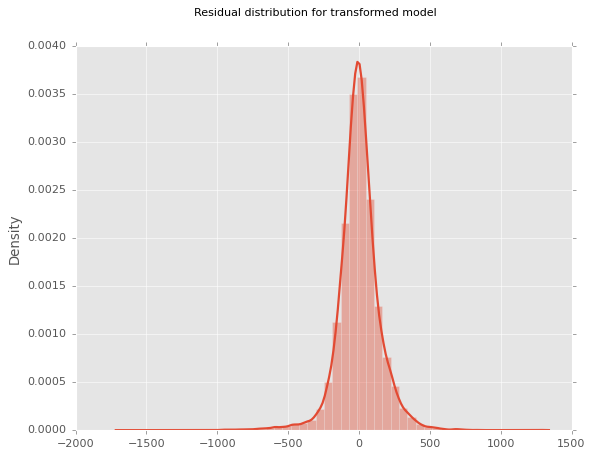



## Observations

- pval > 0.05

`bedrooms` - dropped from the current model

- all variables are statistically significant (pvalue < 0.05)
- Durbin-Watson Score continues to be "fine" but not improve a whole lot.
- Jarque-Bera Score continues to improve but still must come down
- skewness is now an afterthought as its at a very low -0.347
Overall no real improvement of the model happens here, we will try adding in new variables to improve as well as revisit VIFs to likely drop all that were originally at extremely high levels. 


Next steps to improve the model:
1. revisit VIFs to see if any variables(now that outliers are removed and data has been transformed) should now be dropped from the model. 
2. New predictors will be engineered to be added to the model. The next focus will be on the zipcodes in an attempt to narrow down the data with location-dependent price points. Possible data to be looked at are:
- waterfronts 
- views
- school districts: rating, and school taxes
- tax brackets

## Rerunning model after scaling

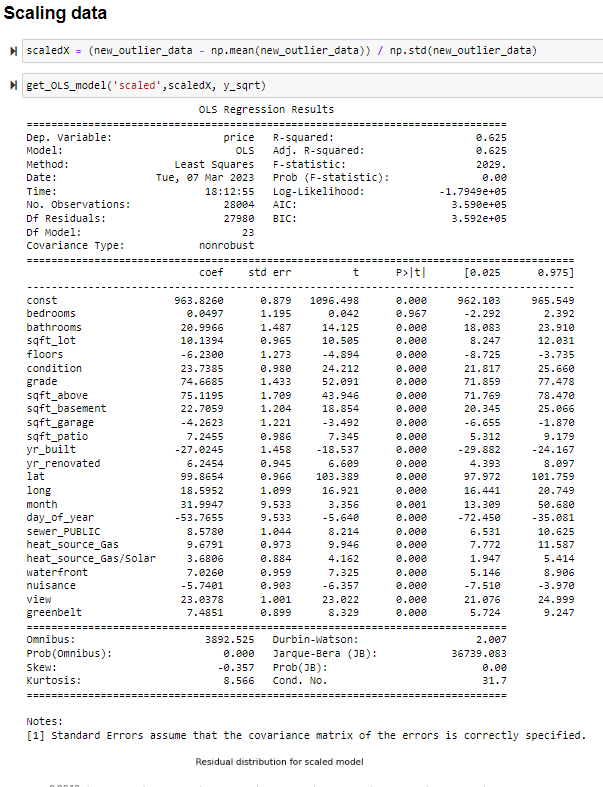

### Residual Distribution Plot 
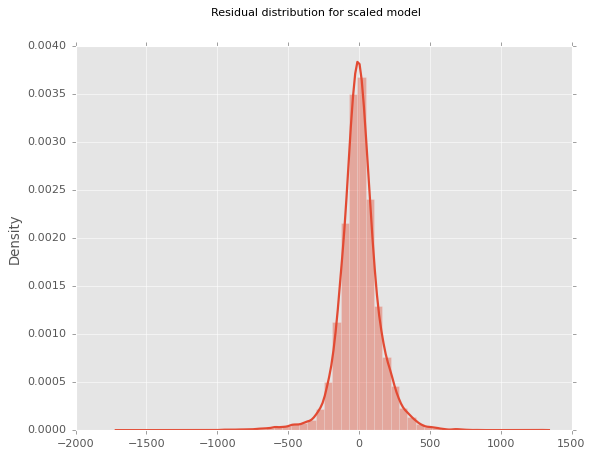


#### Checking VIFs
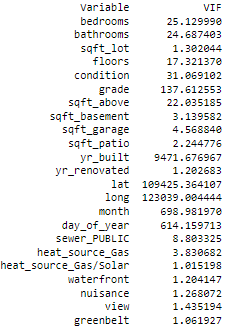


- VIFs for many variables are still elevated and need to be dropped from model if that remains in the final model. 

## Final model

#### Model is ran after adding the waterfront data (one hot encoded) as well as dropping any additional variables that are of a pvalue > 0.05

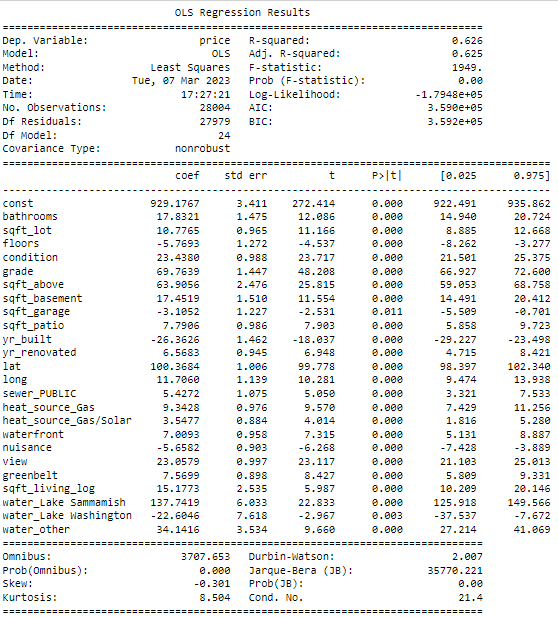

### Residual Distribution Plot 
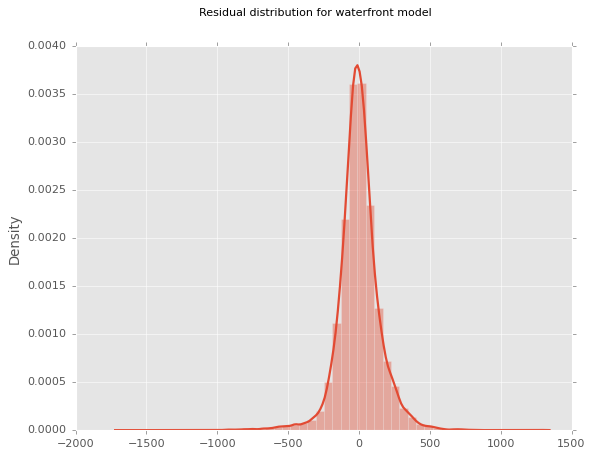


### Final Check on VIFs for multicollinearity

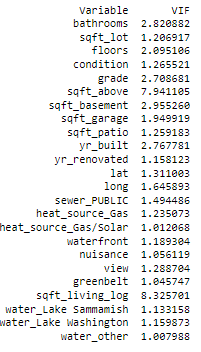

- All VIFs are under 10 with the majority under 3, addressing the issue of multicollinearity. The statsmodel also does not label any concerns on multicollinearity.

### QQplots of all variables

As shown below, the QQplots of all the variables satisfies linearity which is one of the required assumptions for the model, with some issues at the upper and lower tail for some. 
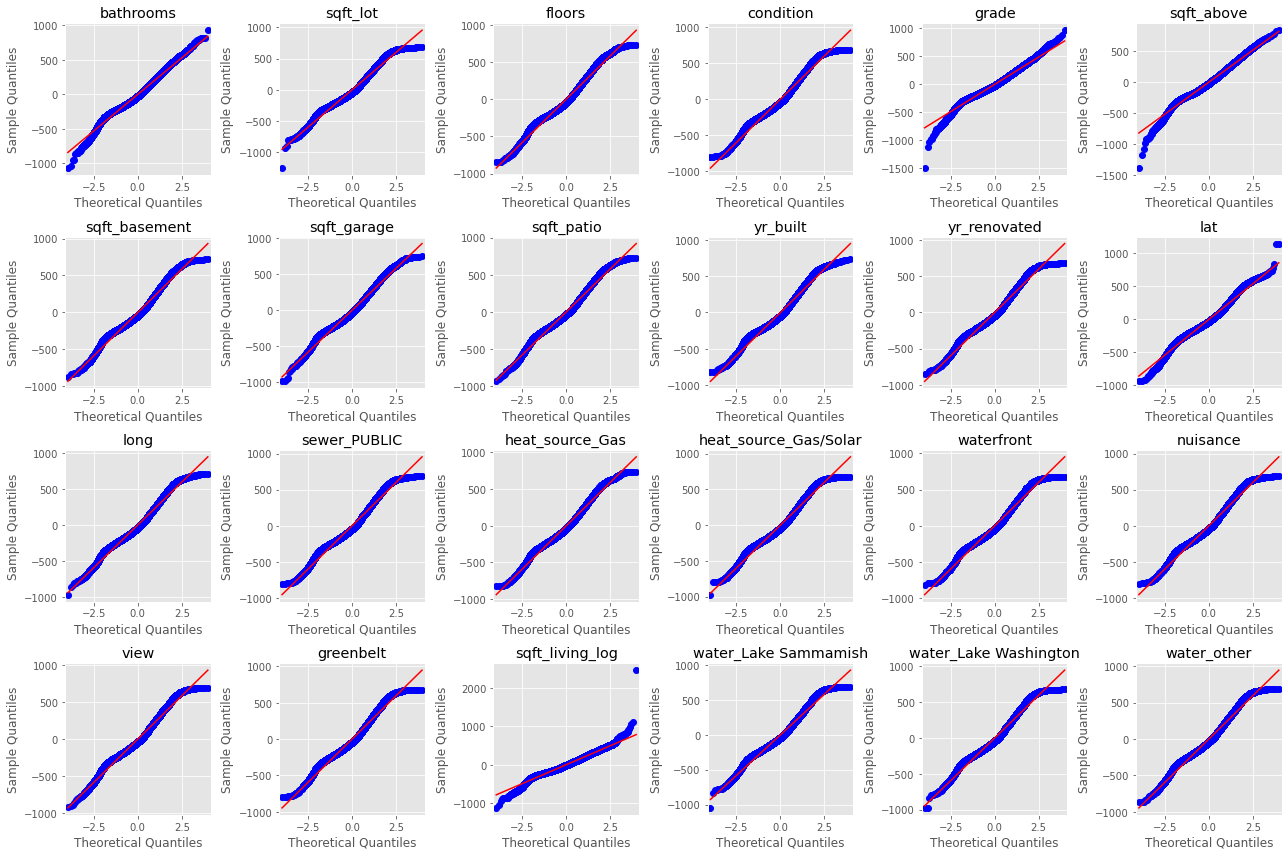

### Interpretation

We have a linear model with the dependent variable (price) square root transformed, and the following independent variables and their corresponding coefficients:

- Bathrooms: 17.832111
- Sqft_lot: 10.776486
- Floors: -5.769272
- Condition: 23.438047
- Grade: 69.763857
- Sqft_above: 63.905587
- Sqft_basement: 17.451898
- Sqft_garage: -3.105150
- Sqft_patio: 7.790561
- Yr_built: -26.362631
- Yr_renovated: 6.568336
- Lat: 100.368386
- Long: 11.706009
- Sewer_PUBLIC: 5.427152
- Heat_source_Gas: 9.342830
- Heat_source_Gas/Solar: 3.547675
- Waterfront: 7.009294
- Nuisance: -5.658225
- View: 23.057945
- Greenbelt: 7.569852
- Sqft_living_log: 15.177339
- Water_Lake Sammamish: 137.741862
- Water_Lake Washington: -22.604616
- Water_other: 34.141607

`- Adjusted rsquared indicates the model explains 62.6% of the data`

`A positive coefficient indicates that as the corresponding independent variable increases, the square root of the price of the house also increases, while a negative coefficient indicates that as the corresponding independent variable increases, the square root of the price of the house decreases.`

`In this model, we see that the most important variable in predicting the square root of house prices is the latitude of the house, with a coefficient of 100.368386. This suggests that houses located further north tend to have higher prices. The next most important variable is water proximity, with the Water_Lake Sammamish variable having a very high coefficient of 137.741862, suggesting that houses located near this lake tend to have much higher prices than other houses. On the other hand, the Water_Lake Washington variable has a negative coefficient, indicating that houses located near this lake tend to have lower prices than other houses.`

`Other important variables include the grade of the house, the square footage of the house above ground, and the condition of the house, all with coefficients greater than 20. The number of bathrooms, square footage of the basement, and the size of the view from the house are also important, with coefficients greater than 15.`

`On the other hand, variables such as the square footage of the garage and the presence of a nuisance nearby have negative coefficients, indicating that houses with larger garages or located near nuisances tend to have lower prices. The year the house was built and the longitude of the house also have negative coefficients, suggesting that older houses and houses located further west tend to have lower prices.`

`Overall, these results suggest that there are many factors that contribute to the price of a house, and that location, house size and quality, and the presence of nearby amenities all play important roles in determining the square root of house prices.`

## Conclusion
This entire process included the above described data engineering techniques, as well as an extensive look at transforming variables, feature selection and elimination through trial and error. Different transformations on the price for example were attempted to normalize the distribution, but the decision was made to use the square root transformation as it lended itself to dealing with the upper and lower tails of the distribution of the price more efficiently. 

The rest of the data cleaning process also included dropping or filling in of missing values, removal of outliers, one hot encoding categorical variables as well as dropping all variables that presented themselves with a high variance inflation factor. The use of QQplots and histograms were used to check the distribution of residuals. 


## Four assumptions
The decisions of the creation of this model were based on the four assumptions with the method of justification, which are:

1. Linearity assumption: Scatterplots of the variables should represent some level of linearity aka correlation to the target variable. The use of scatterplots and correlation matrices were the method of justification for this assumption. 

2. Normality Assumption: Use of QQplots and Residual histograms were the method for justifying normality. 
The normality assumption in linear regression models refers to the assumption that the residuals (i.e., the difference between the observed and predicted values) are normally distributed. This assumption is important because many statistical tests and procedures used in linear regression models rely on the assumption of normality, including hypothesis testing, confidence intervals, and prediction intervals.

One way to check for normality of the residuals is by using a Q-Q plot (quantile-quantile plot). A Q-Q plot is a graphical tool that compares the distribution of the residuals to a normal distribution. If the residuals are normally distributed, the points in the Q-Q plot should follow a straight line. Any deviation from the straight line indicates that the residuals are not normally distributed. Specifically, if the points in the Q-Q plot deviate from the straight line in the tails of the distribution, it suggests that the residuals have heavier tails than a normal distribution. On the other hand, if the points in the Q-Q plot deviate from the straight line in the center of the distribution, it suggests that the residuals have a skewed distribution.

Another way to check for normality of the residuals is by using a histogram. A histogram is a graph that shows the frequency distribution of the residuals. If the residuals are normally distributed, the histogram should have a bell-shaped curve, with the majority of the residuals near the mean and fewer residuals towards the tails of the distribution. Any deviation from the bell-shaped curve indicates that the residuals are not normally distributed.

3. Homoscedasticity: Durbin-Watson score close to 2 indicates that the errors are approximately normally distributed with constant variance.

A Durbin-Watson score close to 2 generally indicates that the model's errors are approximately homoscedastic (i.e., the variance of the errors is constant across all levels of the predictor variables).

This is because a score close to 2 suggests that the errors are approximately normally distributed with constant variance, which is a key assumption of many regression models. When the errors are homoscedastic, it means that the variability of the dependent variable is relatively constant across different levels of the independent variables, which allows for more accurate estimation of the coefficients and predictions of the model.

4. Multicollinearity: VIF scores for independent variables. 

Variance Inflation Factors (VIFs) are a measure used to assess the degree of multicollinearity in a multiple regression model. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other, which can make it difficult to interpret the individual effects of each variable on the dependent variable.


## Final assessment and thoughts of the model
- When plotted the model residuals show a normalized distribution, satisfying the normality assumption although with fairly long tails. This is something to be added into the future work. 
- The Durbin-Watson score is almost exactly 2, satisfying the assumption of homoscedasticity. 
- The linearity assumption was satisfied through a rigorous look at the plots and in general can be a difficult metric to validate. 
- The skew level of the data is well within the acceptable range of -2 to 2 which is a vast improvement from the original model which was originally above 10. 
- The kurtosis level is outside the acceptable range of -7 to 7 at a score of ~8.5, but however is still a major improvement from the original model. This is one that should be looked at later. 
- The Jarque Beras score is a massive 35770 which will require further investigation for future work. My instincts tell me there still may be some major outliers that may be affecting this score as the QQplots appear to be for the most part okay. 



## Conclusion

In this model, we see that the most important variable in predicting the square root of house prices is the latitude of the house, with a coefficient of 100.368386. This suggests that houses located further north tend to have higher prices. The next most important variable is water proximity, with the Water_Lake Sammamish variable having a very high coefficient of 137.741862, suggesting that houses located near this lake tend to have much higher prices than other houses. On the other hand, the Water_Lake Washington variable has a negative coefficient, indicating that houses located near this lake tend to have lower prices than other houses.

Other important variables include the grade of the house, the square footage of the house, and the condition of the house, all with coefficients greater than 20. The number of bathrooms, square footage of the basement, and the size of the view from the house are also important, with coefficients greater than 15.

On the other hand, variables such as the square footage of the garage and the presence of a nuisance nearby have negative coefficients, indicating that houses with larger garages or located near nuisances tend to have lower prices. The year the house was built and the longitude of the house also have negative coefficients, suggesting that older houses and houses located further west tend to have lower prices.

Overall, these results suggest that there are many factors that contribute to the price of a house, and that location, house size and quality, and the presence of nearby amenities all play important roles in determining the square root of house prices.


## Recommendations

For the purposes of Zillows ability to choose inventory in the King County Real Estate Market, I recommend looking at properties that are near Lake Sammish or that are further north that also is accompanied with a waterfront. Since the grade, condition, and number of bathrooms appear positively correlated to the price it would make sense to try and buy older homes in the aformentioned areas as older homes tend to be cheaper in terms of price. Taking these homes and ensuring the grade and condition are of high quality through either pre-assessed purchases or renovations, along with possibly adding bathrooms can raise the price for resell value. 

Houses towards the west as well as ones that present nuisances clearly result in lower prices, so my recommendation would be to avoid buying houses that fit these parameters as it may result in "holding the bag" scenarios which could lead to longer times held with inventory. 

The only invalid metric that should probably be ignored for now(but explored further) is the size of the garage negatively affecting the price. I would not consider this to be an accurate assessment, but I do not want to exclude it from the model. 


Questions model can answer:

- Should the house be on a waterfront?
- How far north should the houses be?
- What age should the house have?
- What level of renovations need to be performed on the houses, and when?
- Will the house price be affected by common nuisances? (eg. noise, construction, bugs)
- How far west should the house be before one should lose interest of the purchase?

## Future Work

In the future work, it is worth revisiting the value of the homes on the remaining waterfronts and seeing if there is any statistical significance. More exploration is needed but was not ready to be presented at this time. 

The views that are highlighted in the column_names.md documentation can be explored and onehotencoded and could be a potential candidate feature. 

Jarque Beras score and outliers of the dataset should be further explored. The use of 3 standard deviations from the mean being the metric for outliers could be expanded slightly as it appears this was still affected in a major way. 

Any independent variables that presented with a Variance Inflation factor above 5 should be looked at again to see if multicollinearity is an issue with these particular variables. 
